In [29]:
# tools for data explanation and visualization
import shap
import seaborn as sns
from sklearn.metrics import confusion_matrix
# tools for data manipulation and munging
import pandas as pd
import numpy as np
# tools that create regression models 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [30]:
df = pd.read_csv(r'.\diabetes_prediction_dataset.csv')
# analysis of data data 
print(f"shape of data: {df.shape}\ncolumns of data: {df.columns}\n\n\nnow, based on the data as seen from data header and the columns we will select the column that would be our target column ")
df.head(20)

shape of data: (100000, 9)
columns of data: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


now, based on the data as seen from data header and the columns we will select the column that would be our target column 


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


(8500, 9)


<AxesSubplot: >

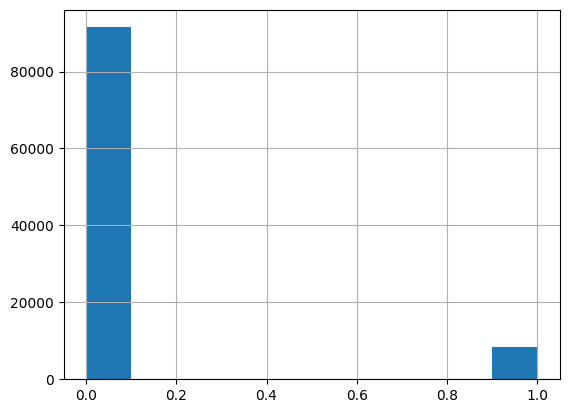

In [31]:
# analysing the output parameter and uh oh we have encountered a huge issue here 
print(df[df['diabetes']==1].shape)
df['diabetes'].hist()

this is called a **skew data** problem i.e *the data is skew toward one result* that might fake the model and make it predict all the values as 0 because of high 0 data points causing it to form an under fit for class 1 this problem can be solved by many methods:
- getting the skew sample resized
- selecting random points from over sized sample 
- selecting the **K th Nearest Neighbour** of each point and generate the synthetic data for each entry of smaller class untill we get equal number of data points . This can be done using **SMOTE** fit from sklearn 
- using both resizing and SMOTE algorithm to generate data *this will avoid generation of huge set of synthetic data that over shadows the orignal data poins*

In [32]:
# using pandas to reshape the data and random selection of other datapoints
df3=df[df['diabetes']==1]
df4=df[df['diabetes']==0]
df3=pd.concat([df4.sample(n=df[df['diabetes']==1].shape[0]),df3])
df3

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
80419,Male,67.0,0,0,never,37.29,6.6,80,0
81889,Female,43.0,0,0,never,22.49,5.7,85,0
70890,Male,66.0,0,0,No Info,26.59,4.0,80,0
76459,Female,80.0,0,0,No Info,27.32,3.5,145,0
98592,Female,34.0,0,0,former,27.32,5.0,159,0
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [33]:
#shuffeling the data to get a little randomization
df3=df3.sample(frac=1).reset_index(drop=True)
x=df3.copy()
y=x[df3.columns[-1]]
del x[df3.columns[-1]]

as you can see in the above data we have a few features that are of *'O'* or **object type** and the random foresst regressor only takes in *int64 , int32, float64 and boolean values* as an input so we will try to transform the data 

In [34]:
# we can use this to one hot encode all the values of tables in pandas from string to lable int
for i in x.columns:
    if(x[i].dtype== 'O'):
        print(f'replacing: {x[i].unique()}, to: {[i for i in range( len(x[i].unique()))]}')
        x.replace(x[i].unique(),[i for i in range( len(x[i].unique()))],inplace=True)

replacing: ['Male' 'Female' 'Other'], to: [0, 1, 2]
replacing: ['former' 'ever' 'No Info' 'never' 'current' 'not current'], to: [0, 1, 2, 3, 4, 5]


In [35]:
# lets see the transformed table 
x.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,58.0,0,1,0,28.17,6.1,240
1,1,27.0,0,0,1,21.25,6.1,145
2,0,61.0,0,1,2,27.32,6.1,80
3,1,59.0,0,0,3,34.02,9.0,220
4,1,17.0,0,0,2,27.32,5.8,160
5,1,60.0,0,0,4,27.20,5.7,159
6,0,44.0,1,1,1,39.13,6.0,159
7,1,69.0,0,0,0,26.15,8.2,159
8,1,17.0,0,0,2,27.32,3.5,160
9,0,47.0,0,0,3,27.98,8.8,159


In [36]:
# splitting the data into test and train samples
xtrain , xtest , ytrain , ytest= train_test_split(x,y,test_size=0.2)

In [37]:
# here we do the fitting of the model and generating the random forest
model= RandomForestRegressor()
# note we have kept the number of features as (features^0.5) because we want to make the maximum possibkle trees and at the same time accomodate for all the elements
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [38]:
# here we are running the SHAP analysis algorithm that analyses the model based on  
# the concepts of game theory and can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction.
explainer = shap.Explainer(model.predict, xtest)
shap_values = explainer(xtest)

Exact explainer: 3401it [06:59,  7.92it/s]                          


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


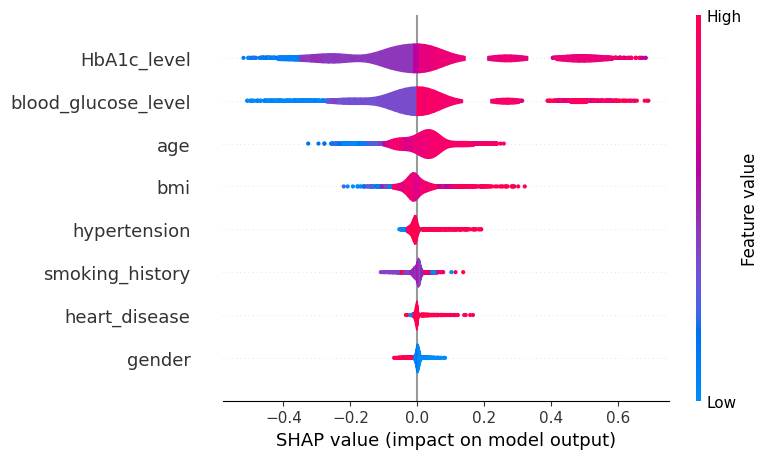

In [39]:
# this is a plot of the datapoints of shap model that explains the role of each feature on y-axis
# and its affects on the model's predicted value where red is high feature value and blue is low feature value that negatively or positively affects the prediction of the model
shap.summary_plot(shap_values,plot_type='violin')

In [40]:
pred= model.predict(xtest)
pred= np.where(pred<0.5,0,1)

<AxesSubplot: >

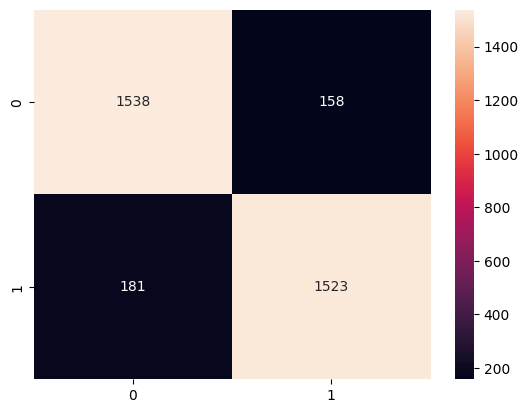

In [41]:
# generating a visual analysis of predictions using confusion matrix and seaborn library to generate matrix and heatmaps respectively
res = confusion_matrix(pred,ytest)
sns.heatmap(res, annot=True, fmt='g')


we can also get the data as a parameterized text output using the sklearn metrics function that generates results like:
-  explained variance
-  accuracy score
-  mean squared log error
-  r2
-  Mean Absolute Error
-  Mean Standard Error
-  Root Mean Square Error

In [42]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    acc = metrics.accuracy_score(y_true,y_pred)
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('accuracy: ', round(acc,4))
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [43]:
regression_results(ytest,pred)

accuracy:  0.9003
explained_variance:  0.6013
mean_squared_log_error:  0.0479
r2:  0.6011
MAE:  0.0997
MSE:  0.0997
RMSE:  0.3158


we will repeat the same steps as above to generate the train data set with a minor change where twice the value of zeroes are taken and the smote algorithm will now be used to generate the **synthetic data**

In [44]:
# using pandas to reshape the data and random selection of other datapoints
df3=df[df['diabetes']==1]
df4=df[df['diabetes']==0]
df3=pd.concat([df4.sample(n=df[df['diabetes']==1].shape[0]*3),df3])
df3

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2805,Female,52.0,0,0,No Info,24.89,6.0,160,0
30599,Female,36.0,0,0,never,25.67,6.5,200,0
31579,Female,9.0,0,0,No Info,17.55,4.5,85,0
36995,Female,42.0,0,0,former,21.90,5.0,159,0
28369,Female,48.0,0,0,No Info,28.41,3.5,85,0
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [45]:
#shuffeling the data to get a little randomization
df3=df3.sample(frac=1).reset_index(drop=True)
x=df3.copy()
y=x[df3.columns[-1]]
del x[df3.columns[-1]]

**NOTE**: SMOTE algorithm does not support object / string datatype

In [46]:
# we can use this to one hot encode all the values of tables in pandas from string to lable int
for i in x.columns:
    if(x[i].dtype== 'O'):
        print(f'replacing: {x[i].unique()}, to: {[i for i in range( len(x[i].unique()))]}')
        x.replace(x[i].unique(),[i for i in range( len(x[i].unique()))],inplace=True)

replacing: ['Female' 'Male' 'Other'], to: [0, 1, 2]
replacing: ['No Info' 'never' 'ever' 'former' 'current' 'not current'], to: [0, 1, 2, 3, 4, 5]


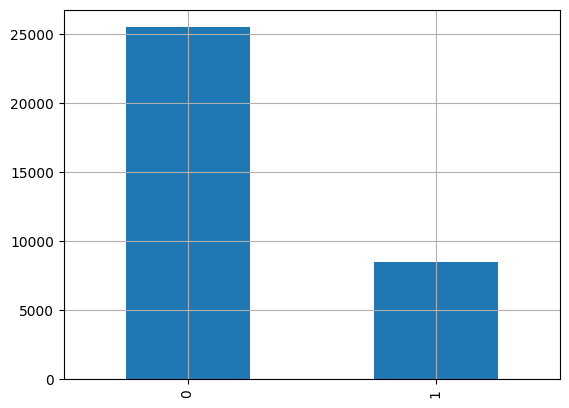

In [47]:
y.value_counts().plot(kind='bar').grid(True)

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.


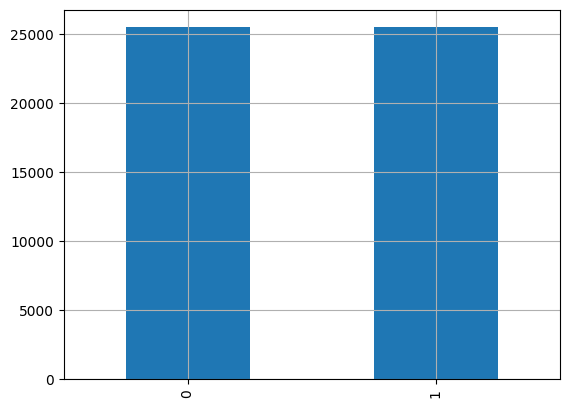

In [48]:
from imblearn.over_sampling import  SMOTE

smote = SMOTE(n_jobs=-1)
x_syn, y_syn = smote.fit_resample(x, y)
y_syn.value_counts().plot(kind='bar').grid(True)

In [49]:
# splitting the data into test and train samples
xtrain2 , xtest2 , ytrain2 , ytest2= train_test_split(x,y,test_size=0.5)
xtrain , xtest , ytrain , ytest= train_test_split(x_syn,y_syn,test_size=0.2)

In [50]:
model2=RandomForestRegressor()
model2.fit(x_syn,y_syn)

RandomForestRegressor()

In [51]:
pred= model2.predict(xtest2)
pred= np.where(pred<0.5,0,1)

In [52]:
regression_results(ytest2,pred)

accuracy:  0.9992
explained_variance:  0.9956
mean_squared_log_error:  0.0004
r2:  0.9956
MAE:  0.0008
MSE:  0.0008
RMSE:  0.0287


<AxesSubplot: >

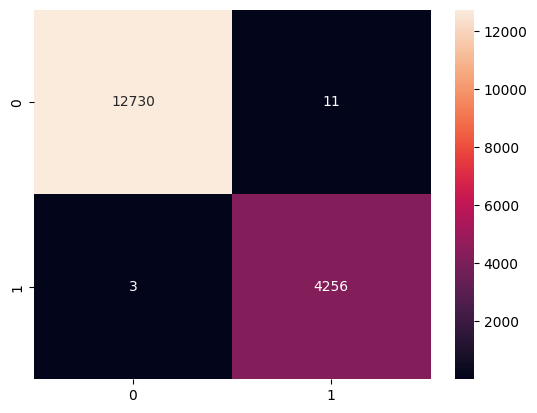

In [53]:
# generating a visual analysis of predictions using confusion matrix and seaborn library to generate matrix and heatmaps respectively
res = confusion_matrix(pred,ytest2)
sns.heatmap(res, annot=True, fmt='g')

In [56]:
# here we are running the SHAP analysis algorithm that analyses the model based on  
# the concepts of game theory and can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction.
explainer = shap.Explainer(model2.predict, xtest)
shap_values = explainer(xtest)

Exact explainer: 10201it [20:40,  8.15it/s]                           


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


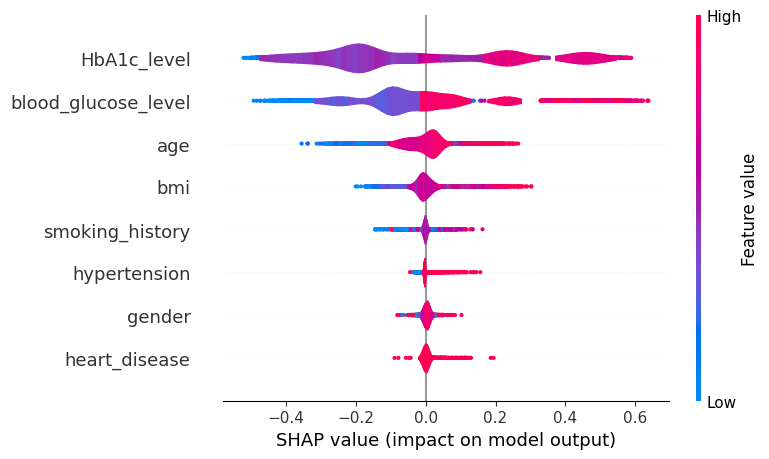

In [57]:
# this is a plot of the datapoints of shap model that explains the role of each feature on y-axis
# and its affects on the model's predicted value where red is high feature value and blue is low feature value that negatively or positively affects the prediction of the model
shap.summary_plot(shap_values,plot_type='violin')